In [1]:
import pandas as pd
df = pd.read_csv("../datasets/data_science_job.csv")
df_copy = df.copy()
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


In [2]:
row,col = df.shape
print(f"Rows : {row} \nColumns : {col}")

Rows : 5000 
Columns : 12


In [3]:
df.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

In [4]:
df.isna().any()          # df.isnull().any()

work_year             False
job_title             False
job_category           True
salary_currency        True
salary                False
salary_in_usd         False
employee_residence    False
experience_level       True
employment_type       False
work_setting          False
company_location      False
company_size           True
dtype: bool

In [5]:
df.isna().sum()          # gives total sum of null values in a particular column.

work_year               0
job_title               0
job_category          500
salary_currency       500
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64

In [6]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


In [7]:
df["salary_currency"].unique()

array(['EUR', 'JPY', 'INR', nan, 'us dolars', 'GBP'], dtype=object)

### Converting "salary_in_usd" to INR

In [8]:
df["USD_to_INR"] = df["salary_in_usd"]*84.39
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,USD_to_INR
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L,11484297.54
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M,5737000.98
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L,12937746.51
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L,11413072.38
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S,2966814.84


### Drop Columns

In [9]:
df = df.drop("salary_in_usd", axis=1).drop("salary_currency", axis=1).drop("salary", axis=1)
df.head()

,work_year,job_title,job_category,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,USD_to_INR
0,2022,Machine Learning Engineer in office,Analysis,US,MI,CT,Remote,DE,L,11484297.54
1,2020,Statistician (Remote),ML/AI,JP,EX,FL,Remote,IN,M,5737000.98
2,2022,Machine Learning Engineer,ML/AI,UK,MI,CT,Hybrid,CN,L,12937746.51
3,2022,Data Analyst in office,ML/AI,DE,SE,FT,Hybrid,MX,L,11413072.38
4,2020,Statistician,Data Science,UK,MI,FT,In-person,UK,S,2966814.84


### Rename Column

In [10]:
df = df.rename(columns={"work_year" : "year", "USD_to_INR" : "salary_in_INR", "work_setting" : "work_type"})
df.head()

,year,job_title,job_category,employee_residence,experience_level,employment_type,work_type,company_location,company_size,salary_in_INR
0,2022,Machine Learning Engineer in office,Analysis,US,MI,CT,Remote,DE,L,11484297.54
1,2020,Statistician (Remote),ML/AI,JP,EX,FL,Remote,IN,M,5737000.98
2,2022,Machine Learning Engineer,ML/AI,UK,MI,CT,Hybrid,CN,L,12937746.51
3,2022,Data Analyst in office,ML/AI,DE,SE,FT,Hybrid,MX,L,11413072.38
4,2020,Statistician,Data Science,UK,MI,FT,In-person,UK,S,2966814.84


In [11]:
df["job_title"].unique()

array(['Machine Learning Engineer  in office', 'Statistician  (Remote)',
       'Machine Learning Engineer  ', 'Data Analyst  in office',
       'Statistician  ', 'Data Scientist  (Remote)', 'Data Analyst  ',
       'Data Engineer  in office', 'Data Scientist  ',
       'Machine Learning Engineer  (Remote)', 'Data Engineer  ',
       'Data Engineer  (Remote)', 'Data Scientist  in office',
       'Data Analyst  (Remote)', 'Statistician  in office'], dtype=object)

In [12]:
df = df.map(lambda x:x.strip() if isinstance(x, str) else x)
df.head()

,year,job_title,job_category,employee_residence,experience_level,employment_type,work_type,company_location,company_size,salary_in_INR
0,2022,Machine Learning Engineer in office,Analysis,US,MI,CT,Remote,DE,L,11484297.54
1,2020,Statistician (Remote),ML/AI,JP,EX,FL,Remote,IN,M,5737000.98
2,2022,Machine Learning Engineer,ML/AI,UK,MI,CT,Hybrid,CN,L,12937746.51
3,2022,Data Analyst in office,ML/AI,DE,SE,FT,Hybrid,MX,L,11413072.38
4,2020,Statistician,Data Science,UK,MI,FT,In-person,UK,S,2966814.84


In [13]:
df.job_title.unique()

array(['Machine Learning Engineer  in office', 'Statistician  (Remote)',
       'Machine Learning Engineer', 'Data Analyst  in office',
       'Statistician', 'Data Scientist  (Remote)', 'Data Analyst',
       'Data Engineer  in office', 'Data Scientist',
       'Machine Learning Engineer  (Remote)', 'Data Engineer',
       'Data Engineer  (Remote)', 'Data Scientist  in office',
       'Data Analyst  (Remote)', 'Statistician  in office'], dtype=object)

### Filtering records with "job_title" = "Data Engineer" and "experience_level" = "EN(Entry Level)"

In [14]:
temp = df[(df["job_title"]=="Data Engineer") & (df["experience_level"]=="EN")]
temp

,year,job_title,job_category,employee_residence,experience_level,employment_type,work_type,company_location,company_size,salary_in_INR
14,2021,Data Engineer,Analysis,JP,EN,FT,Hybrid,CN,M,9113107.32
218,2020,Data Engineer,Engineering,CN,EN,CT,Hybrid,UK,M,8297731.14
256,2021,Data Engineer,Analysis,US,EN,PT,In-person,UK,M,15645062.10
266,2022,Data Engineer,Data Science,US,EN,FL,Remote,CN,S,14563604.25
316,2021,Data Engineer,ML/AI,UK,EN,FT,Remote,US,L,5735313.18
...,...,...,...,...,...,...,...,...,...,...
4796,2020,Data Engineer,ML/AI,DE,EN,FL,Remote,JP,M,5532945.96
4822,2021,Data Engineer,Analysis,MX,EN,CT,Remote,CN,M,8606598.54
4861,2021,Data Engineer,Engineering,JP,EN,FT,Hybrid,UK,S,15979415.28
4897,2020,Data Engineer,Engineering,UK,EN,FL,Hybrid,MX,S,13371004.77


In [15]:
temp.columns

Index(['year', 'job_title', 'job_category', 'employee_residence',
       'experience_level', 'employment_type', 'work_type', 'company_location',
       'company_size', 'salary_in_INR'],
      dtype='object')

### Average Salary of Data Engineer(Entry Level)

In [16]:
print(f"Average Salary : {temp['salary_in_INR'].mean()}rs")

Average Salary : 9257548.7165625rs


### Grouping by job_category

In [17]:
salary_by_job_category = temp.groupby("job_category")["salary_in_INR"].sum()
salary_by_job_category

job_category
Analysis        1.434570e+08
Data Science    1.702042e+08
Engineering     1.572641e+08
ML/AI           1.215579e+08
Name: salary_in_INR, dtype: float64

# Matplotlib

In [18]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Cube of a Number')

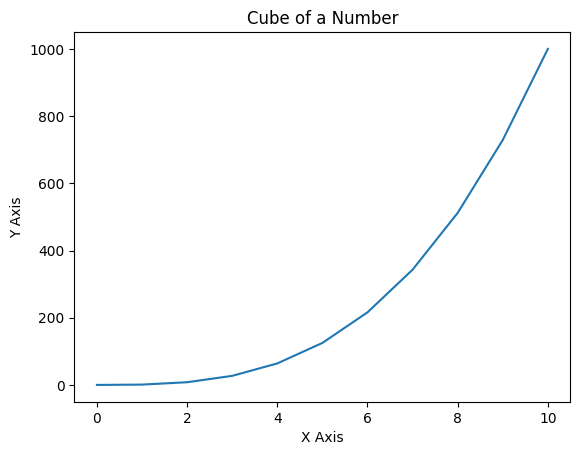

In [19]:
x = [i for i in range(11)]
y = [i**3 for i in range(11)]

plt.plot(x,y)

plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Cube of a Number")

Text(0.5, 1.0, 'Square of a Number')

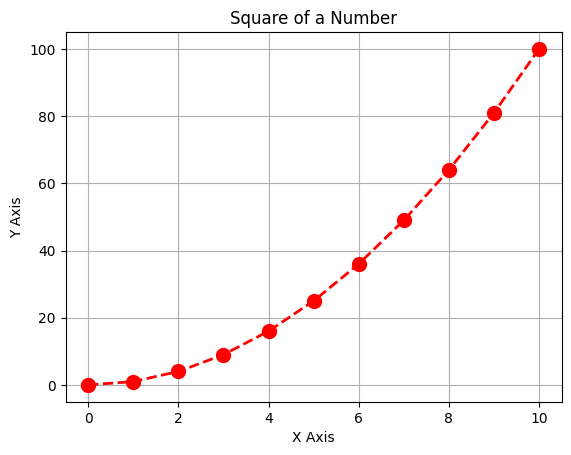

In [20]:
x = [i for i in range(11)]
y = [i**2 for i in range(11)]

plt.plot(x,y, color="red", linestyle="--", marker="o", markersize=10, linewidth=2)
plt.grid(True)

plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Square of a Number")

### subplot

Text(0.5, 1.0, 'Plot 4')

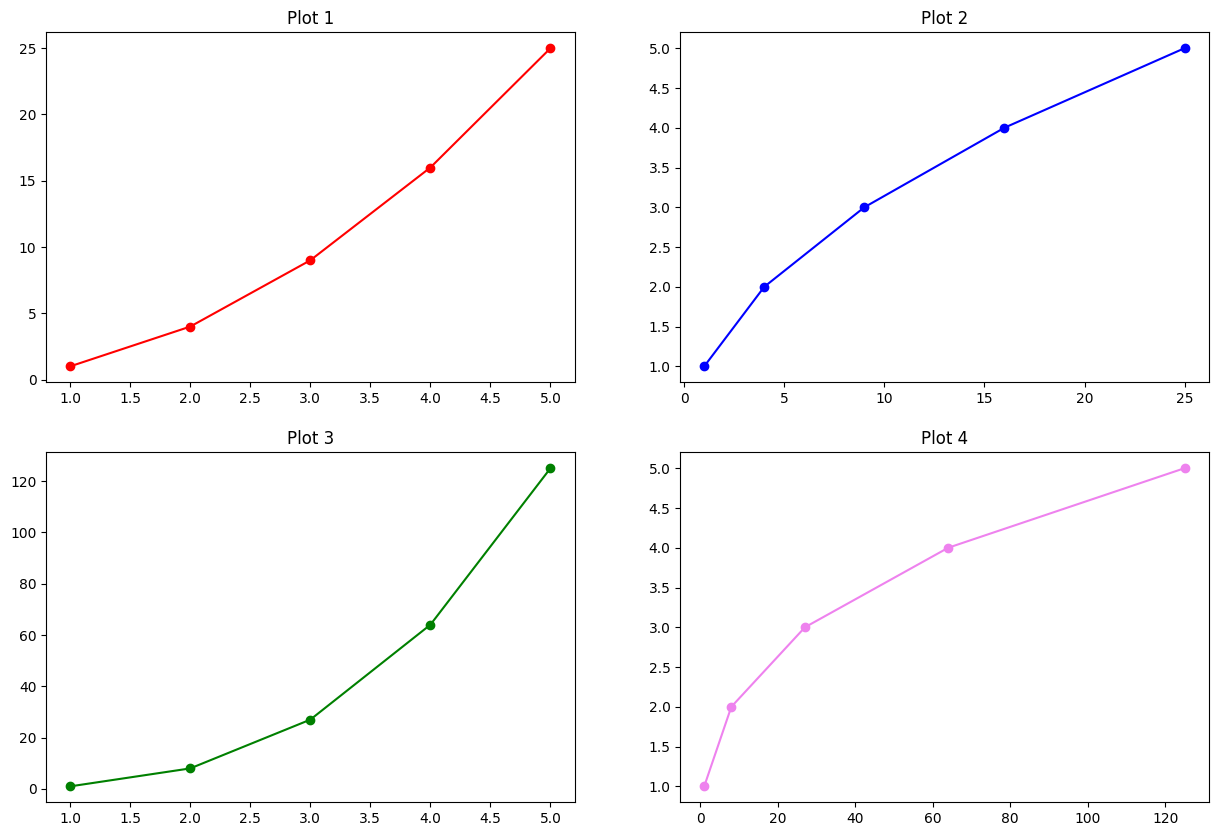

In [21]:
x = [1,2,3,4,5]
y = [1,4,9,16,25]
z = [1,8,27,64,125]

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)            # row = 2, column = 2, position = 1
plt.plot(x,y, color="red", marker="o")
plt.title("Plot 1")

plt.subplot(2,2,2)
plt.plot(y,x, color="blue", marker="o")
plt.title("Plot 2")

plt.subplot(2,2,3)
plt.plot(x,z, color="green", marker="o")
plt.title("Plot 3")

plt.subplot(2,2,4)
plt.plot(z,x, color="violet", marker="o")
plt.title("Plot 4")

### Barplot

<BarContainer object of 5 artists>

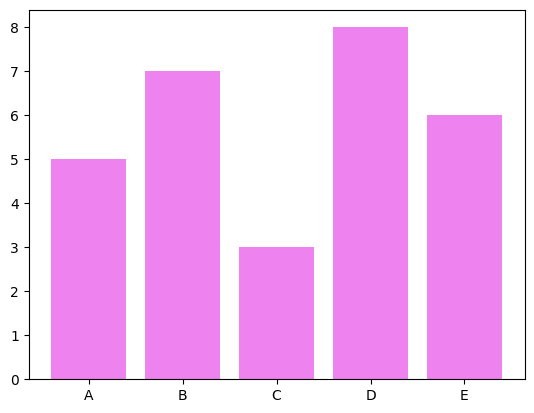

In [22]:
categories = ["A", "B", "C", "D", "E"]
values = [5,7,3,8,6]

plt.bar(categories, values, color="violet")

### Histogram
* It is used to represent the distribution of dataset. They divide the data into bins and count the number of data points in each bin.
* Simply known as total no of values in a particular range of intervals based on bin size.

(array([1., 2., 3., 2., 4.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

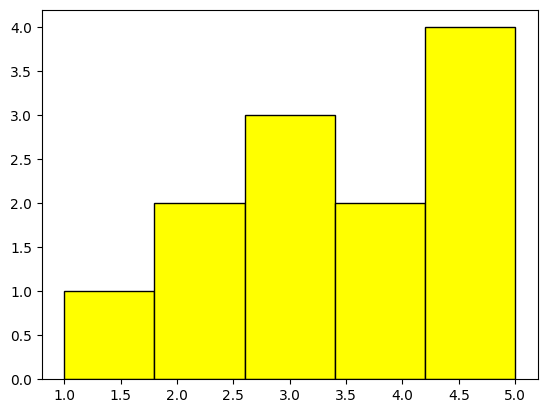

In [23]:
data = [1,2,2,3,3,3,4,4,5,5,5,5]
plt.hist(data, bins=5, color="yellow", edgecolor="black")

### Scatter plot
* without out any line

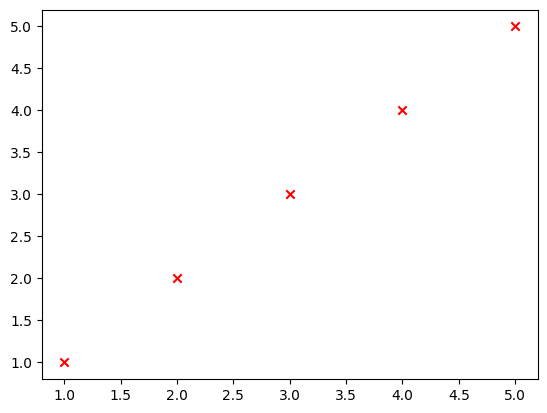

In [24]:
x = [1,2,3,4,5]
plt.scatter(x,x, color="red", marker="x")

### Pie Chart

([<matplotlib.patches.Wedge at 0x22182fae050>,
 [Text(1.0251401491869723, 0.3988579628450614, 'A'),
  Text(-0.604038788584402, 0.9193134078677894, 'B'),
  Text(-0.8107499278716709, -0.7434275717620921, 'C'),
  Text(0.4115066808932634, -1.0201285465960699, 'D'),
  Text(1.0879062929344288, -0.1626649863789663, 'E')],
 [Text(0.5591673541019848, 0.21755888882457894, '11.81%'),
  Text(-0.3294757028642192, 0.5014436770187941, '44.88%'),
  Text(-0.4422272333845477, -0.4055059482338684, '10.24%'),
  Text(0.22445818957814365, -0.5564337526887654, '28.35%'),
  Text(0.5934034325096883, -0.08872635620670886, '4.72%')])

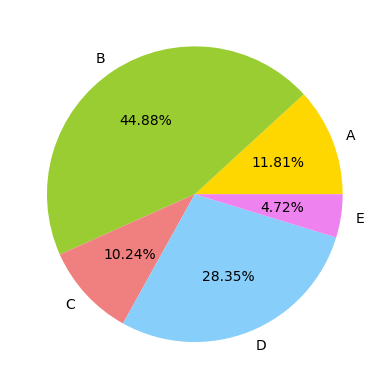

In [25]:
labels = ["A", "B", "C", "D", "E"]
values = [15, 57, 13, 36, 6]
colors = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "violet"]
explode = (0.2,0,0,0,0)

plt.pie(values,labels=labels, colors=colors, autopct="%.2f%%")

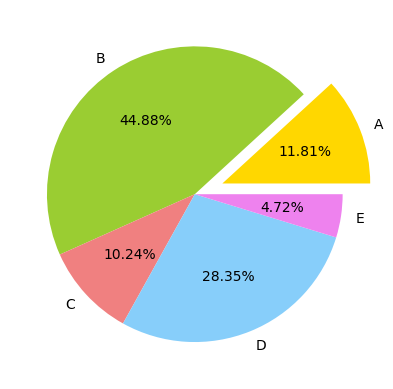

In [26]:
labels = ["A", "B", "C", "D", "E"]
values = [15, 57, 13, 36, 6]
colors = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "violet"]
explode = (0.2,0,0,0,0)

plt.pie(values,labels=labels, explode=explode, colors=colors, autopct="%.2f%%")
plt.show()             # the additional info will not be shown in the output.

### From the above example (16th cell)

In [27]:
salary_by_job_category

job_category
Analysis        1.434570e+08
Data Science    1.702042e+08
Engineering     1.572641e+08
ML/AI           1.215579e+08
Name: salary_in_INR, dtype: float64

### To use plt.bar(), we require x axis data and y axis data

In [28]:
# plt.bar(salary_by_job_category)

<Axes: xlabel='job_category'>

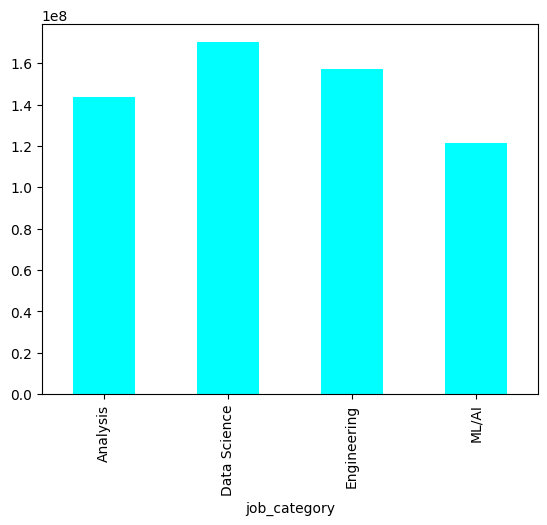

In [29]:
salary_by_job_category.plot(kind="bar", color="cyan")

### Reset Index

In [30]:
temp1 = salary_by_job_category.reset_index()
temp1

,job_category,salary_in_INR
0,Analysis,1.434570e+08
1,Data Science,1.702042e+08
2,Engineering,1.572641e+08
3,ML/AI,1.215579e+08


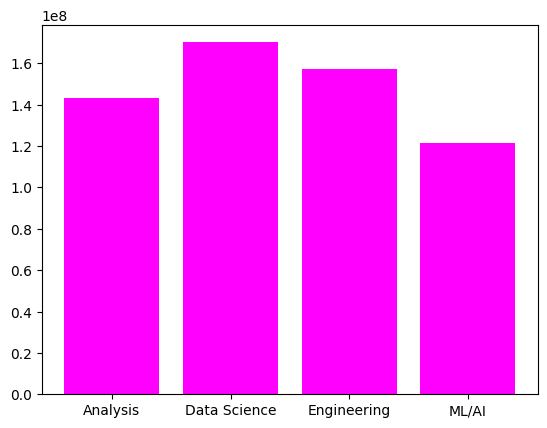

In [31]:
plt.bar(temp1["job_category"], temp1["salary_in_INR"], color="magenta")
plt.show()

# Seaborn

In [32]:
import seaborn as sns

### Basic plotting with seaborn

* load_dataset ---> It is an inbuilt function for seaborn
* tips ---> it is also present in it.

In [33]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Scatter plot

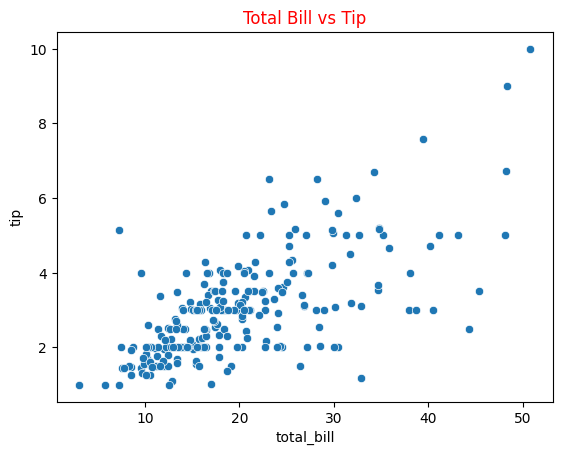

In [34]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.title("Total Bill vs Tip", color="Red")
plt.show()

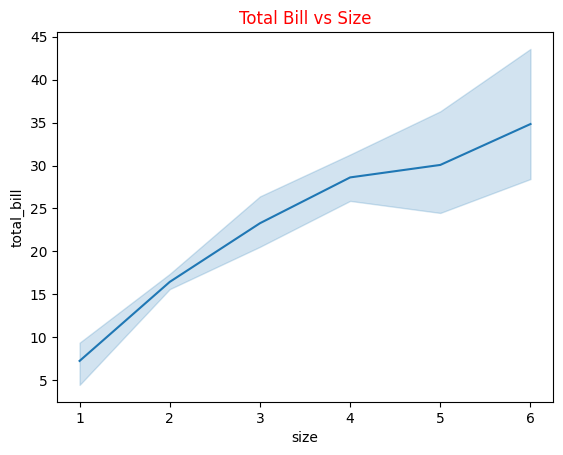

In [35]:
sns.lineplot(data=tips, x="size", y="total_bill")
plt.title("Total Bill vs Size", color="red")
plt.show()

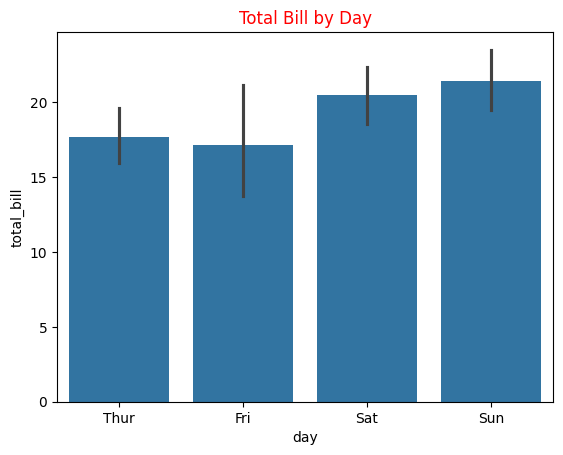

In [36]:
sns.barplot(data=tips, x="day", y="total_bill")
plt.title("Total Bill by Day", color="red")
plt.show()

### Box plot
* It is similar to candle stick pattern in stocks, Here 
* bottom wick = min value
* top wick = max value
* candle bottom = 25%
* candle top = 75%
* middle line = 50%

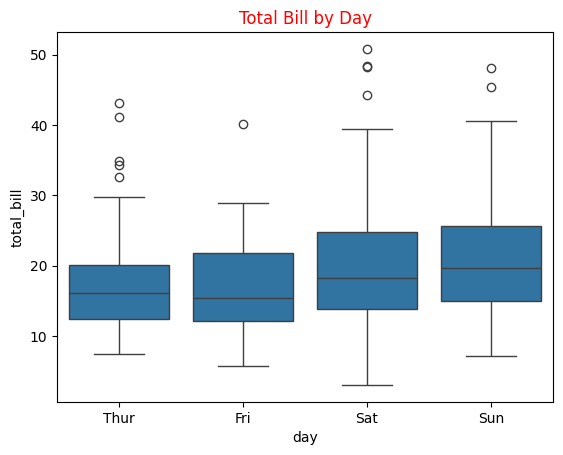

In [37]:
sns.boxplot(data=tips, x="day", y="total_bill")
plt.title("Total Bill by Day", color="red")
plt.show()

### Violin plot
* It gives additional information to box plot

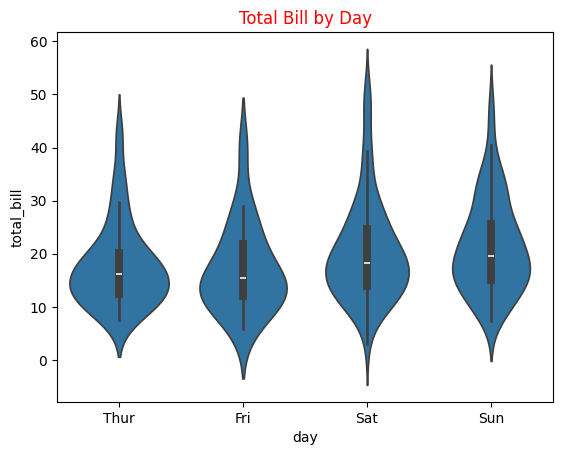

In [38]:
sns.violinplot(data=tips, x="day", y="total_bill")
plt.title("Total Bill by Day", color="red")
plt.show()

### Histogram plot

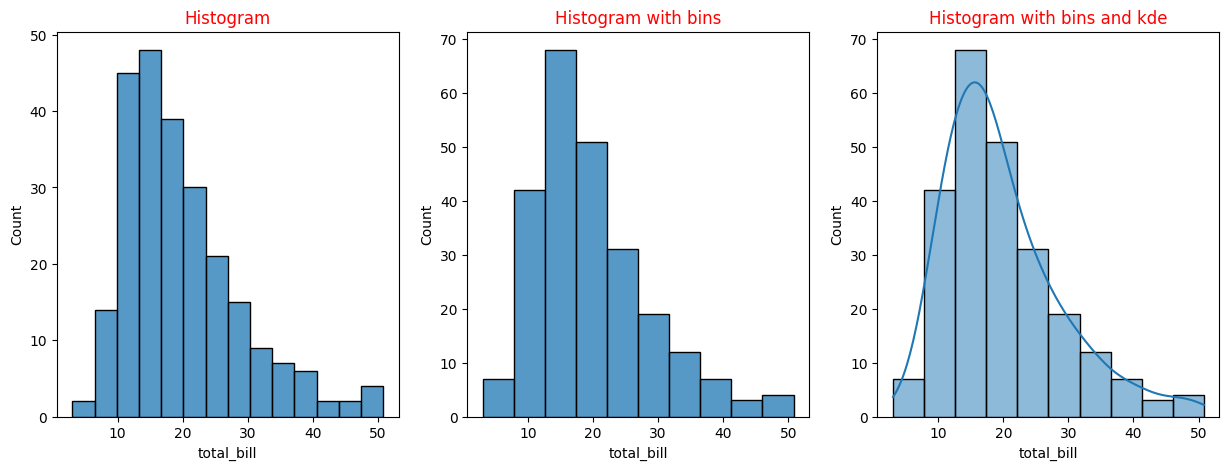

In [39]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(tips["total_bill"])
plt.title("Histogram", color="red")

plt.subplot(1,3,2)
sns.histplot(tips["total_bill"], bins=10)    # bins = 10 the total divisions on x-axis is 10
plt.title("Histogram with bins", color="red")

plt.subplot(1,3,3)
sns.histplot(tips["total_bill"], bins=10, kde=True)    # kde ---> Kernal Density Estimation
plt.title("Histogram with bins and kde", color="red")

plt.show()

### KDE plot
* kernel Density Estimation

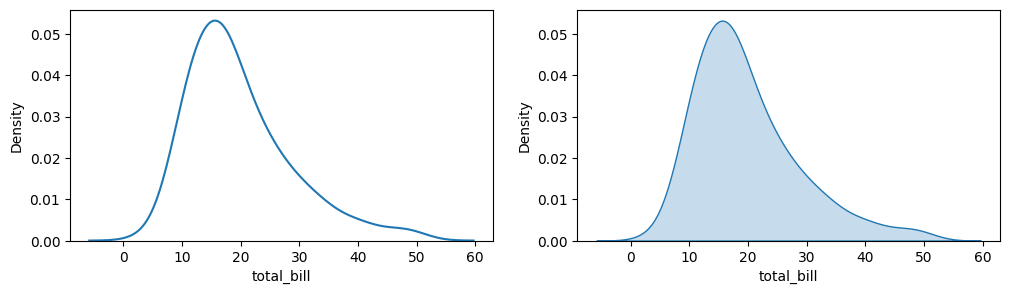

In [40]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
sns.kdeplot(tips["total_bill"])

plt.subplot(1,2,2)
sns.kdeplot(tips["total_bill"], fill=True)

plt.show()

### Pair plot
* It gives all the plots of the numerical data of each column in a dataframe.

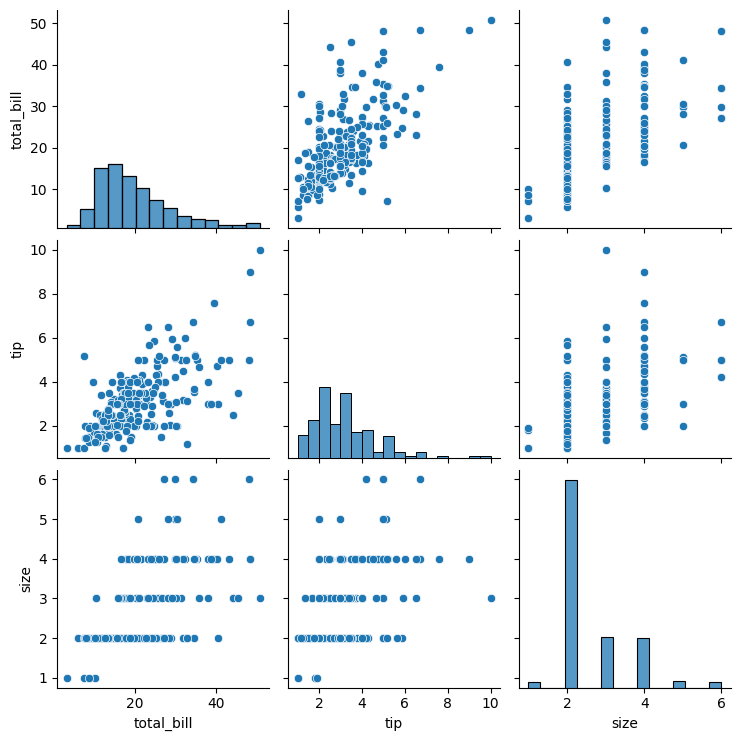

In [41]:
sns.pairplot(tips)
plt.show()

### Heatmap

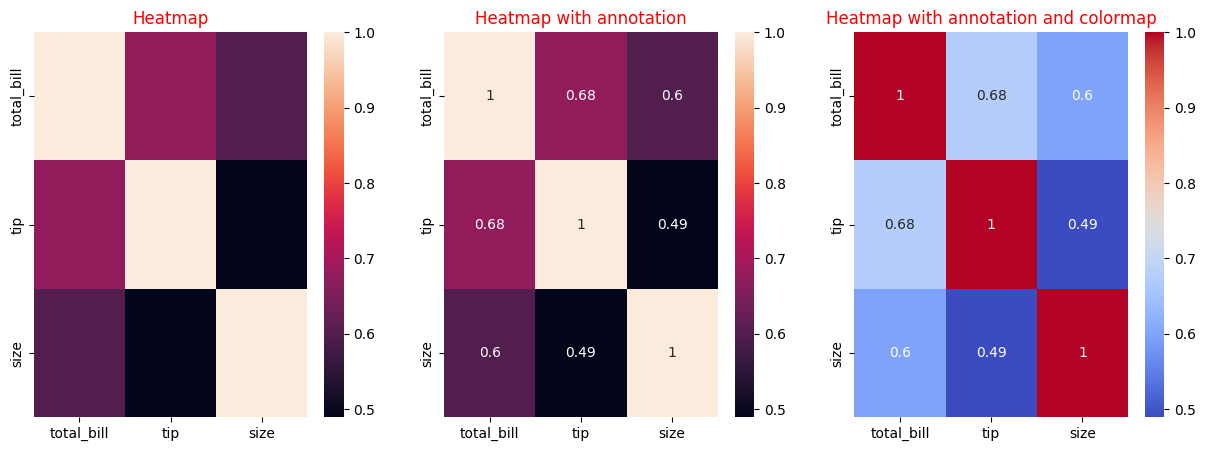

In [42]:
corr_df = tips[["total_bill", "tip", "size"]].corr()
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.heatmap(corr_df)
plt.title("Heatmap", color="red")

plt.subplot(1,3,2)
sns.heatmap(corr_df, annot=True)
plt.title("Heatmap with annotation", color="red")

plt.subplot(1,3,3)
sns.heatmap(corr_df, annot=True, cmap="coolwarm")
plt.title("Heatmap with annotation and colormap", color="red")

plt.show()